Importing the necessary libraries

In [54]:
from keras.datasets import mnist
from sklearn.cluster import KMeans
import random
import numpy as np
import matplotlib.pyplot as plt


Load the Train and Test dataset

In [55]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()


Normalize the data and reshape it

In [56]:
# Normalize the data
train_X = train_X.astype(float)/255
test_X = test_X.astype(float)/255

# Reshape the data
train_X = train_X.reshape((train_X.shape[0], -1))
test_X = test_X.reshape((test_X.shape[0], -1))


Trim the dataset to include only 100 samples from each digit

In [57]:
data_count = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Train_X = []
Train_Y = []
for i in range(len(train_Y)):
    if data_count[train_Y[i]] < 100:
        Train_X.append(train_X[i])
        Train_Y.append(train_Y[i])
        data_count[train_Y[i]] += 1


Case (i) : Random initialization of cluster representatives

Train the K Means Clustering model and print number of iterations along with the cluster representatives

No of iterations in case-1(random):  28
The cluster representatives are: 


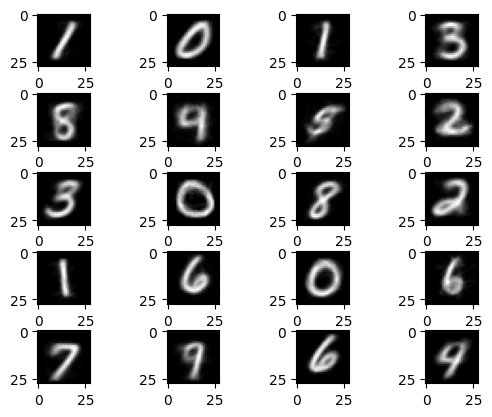

In [58]:
cluster_representatives = []
for i in range(20):
    representative = []
    for j in range(784):
        representative.append(random.random())
    cluster_representatives.append(representative)
cluster_representatives = np.array(cluster_representatives)

kmeans = KMeans(n_clusters=20, init=cluster_representatives, n_init=1)
kmeans.fit(Train_X)

print("No of iterations in case-1(random): ", kmeans.n_iter_)

print("The cluster representatives are: ")
for i in range(20):
    plt.subplots_adjust(hspace=0.5)
    plt.subplot(5, 4, i+1)
    plt.imshow(kmeans.cluster_centers_[i].reshape((28, 28)), cmap='gray')
plt.show()


These are hardcoded values of the cluster representatives to calculate the accuracy by the Test labels

In [59]:
# Change them accordingly when you rerun the above code and get different cluster representatives
Actual_labels = [1,0,1,3,8,9,5,2,3,0,8,2,1,6,0,6,7,9,6,9]


Predict the labels for the Test dataset and modify them corresponding to the Actual_labels

In [60]:
Test_X = test_X[:50]
Test_Y = test_Y[:50]

predicted_labels = kmeans.predict(Test_X)
predicted_labels = [Actual_labels[i] for i in predicted_labels]

print("The predicted labels are: ")
print(predicted_labels)
print("The actual labels are: ")
print(list(Test_Y))


The predicted labels are: 
[7, 2, 1, 0, 9, 1, 9, 9, 6, 7, 0, 2, 9, 0, 1, 3, 9, 9, 3, 9, 7, 6, 2, 8, 9, 0, 9, 9, 0, 1, 3, 1, 3, 0, 7, 2, 9, 1, 2, 1, 1, 9, 9, 1, 1, 3, 1, 5, 9, 9]
The actual labels are: 
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4]


Calculate the accuracy of the model

In [61]:
correct = 0
for i in range(len(Test_Y)):
    if Test_Y[i] == predicted_labels[i]:
        correct += 1
print("The accuracy is: ", correct/len(Test_Y))


The accuracy is:  0.52


Tabulation of the value of J_clust for different values of K

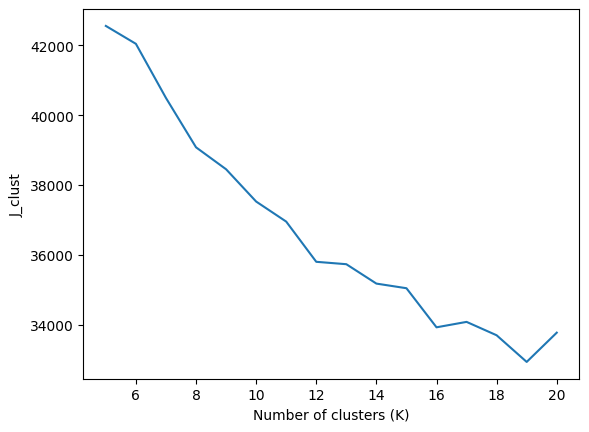

The optimal value of K is:  19


In [62]:
j_clust = []
for k in range(5, 21):
    cluster_representatives = []

    for i in range(k):
        representative = []
        for j in range(784):
            representative.append(random.random())
        cluster_representatives.append(representative)
    cluster_representatives = np.array(cluster_representatives)

    kmeans = KMeans(n_clusters=k, init=cluster_representatives, n_init=1)
    kmeans.fit(Train_X)
    j_clust.append(kmeans.inertia_)

plt.plot(range(5, 21), j_clust)
plt.xlabel("Number of clusters (K)")
plt.ylabel("J_clust")
plt.show()

# Optimal value of K
print("The optimal value of K is: ", j_clust.index(min(j_clust))+5)


Case (ii) : Choose Cluster Representatives from the given data set

Train the K Means Clustering model and print number of iterations along with the cluster representatives

No of iterations in case-2(random):  26
The cluster representatives are: 


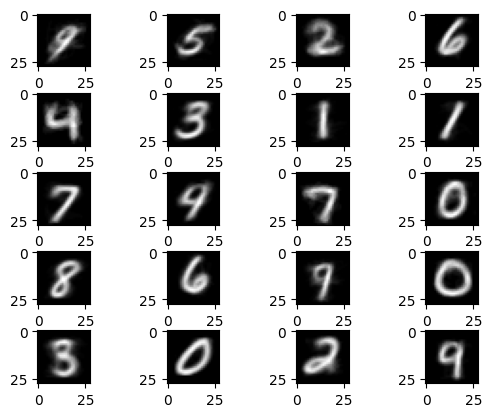

In [63]:
kmeans = KMeans(n_clusters=20, init='random', n_init=1)
kmeans.fit(Train_X)

print("No of iterations in case-2(random): ", kmeans.n_iter_)

print("The cluster representatives are: ")
for i in range(20):
    plt.subplots_adjust(hspace=0.5)
    plt.subplot(5, 4, i+1)
    plt.imshow(kmeans.cluster_centers_[i].reshape((28, 28)), cmap='gray')
plt.show()


These are hardcoded values of the cluster representatives to calculate the accuracy by the Test labels

In [64]:
# Change them accordingly when you rerun the above code and get different cluster representatives
Actual_labels = [9,5,2,6,4,3,1,1,7,9,7,0,8,6,9,0,3,0,2,9]


Predict the labels for the Test dataset and modify them corresponding to the Actual_labels

In [65]:
Test_X = test_X[:50]
Test_Y = test_Y[:50]

predicted_labels = kmeans.predict(Test_X)
predicted_labels = [Actual_labels[i] for i in predicted_labels]

print("The predicted labels are: ")
print(predicted_labels)
print("The actual labels are: ")
print(list(Test_Y))


The predicted labels are: 
[7, 2, 1, 0, 9, 1, 9, 9, 2, 7, 0, 2, 9, 0, 1, 3, 9, 7, 3, 9, 7, 6, 2, 3, 9, 0, 7, 9, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 3, 1, 1, 9, 9, 9, 1, 3, 1, 9, 9, 4]
The actual labels are: 
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4]


Calculate the accuracy of the model

In [66]:
correct = 0
for i in range(len(Test_Y)):
    if Test_Y[i] == predicted_labels[i]:
        correct += 1
print("The accuracy is: ", correct/len(Test_Y))


The accuracy is:  0.58


Tabulation of the value of J_clust for different values of K

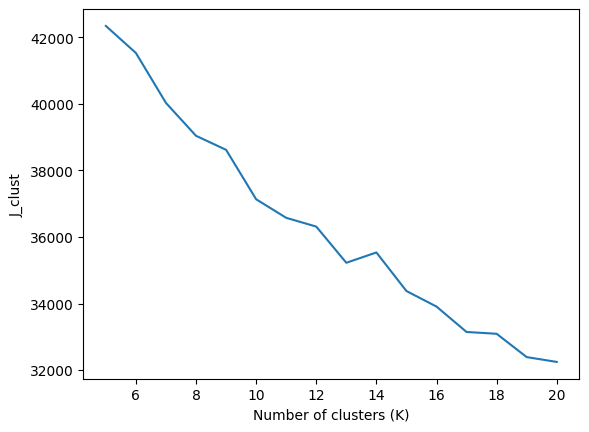

The optimal value of K is:  20


In [67]:
j_clust = []
for k in range(5, 21):
    kmeans = KMeans(n_clusters=k, init='random', n_init=1)
    kmeans.fit(Train_X)
    j_clust.append(kmeans.inertia_)

plt.plot(range(5, 21), j_clust)
plt.xlabel("Number of clusters (K)")
plt.ylabel("J_clust")
plt.show()

# Optimal value of K
print("The optimal value of K is: ", j_clust.index(min(j_clust))+5)
